In [1]:
import os
import sonia
from sonia.sonia_leftpos_rightpos import SoniaLeftposRightpos
from sonia.plotting import Plotter
from sonia.evaluate_model import EvaluateModel
from sonia.sequence_generation import SequenceGeneration
import numpy as np
import pandas as pd

# load lists of sequences with gene specification

In [2]:
# this assume data sequences are in semi-colon separated text file, with gene specification
data_seqs = list(pd.read_csv('data_seqs.csv.gz').values.astype(np.str))
data_seqs[:3]

[array(['CASSKQGASEAFF', 'TRBV7-8', 'TRBJ1-1'], dtype='<U26'),
 array(['CASSPPPNYGYTF', 'TRBV6-1', 'TRBJ1-2'], dtype='<U26'),
 array(['CASSTDTTEAFF', 'TRBV6-5', 'TRBJ1-1'], dtype='<U26')]

# define and infer model

In [3]:
qm = SoniaLeftposRightpos(data_seqs=data_seqs,chain_type='humanTRB')

In [4]:
# add generated sequences (you can add them from file too, more is better.)
qm.add_generated_seqs(int(2e5)) 

In [5]:
#define and train model
qm.infer_selection(epochs=30)

# do some plotting

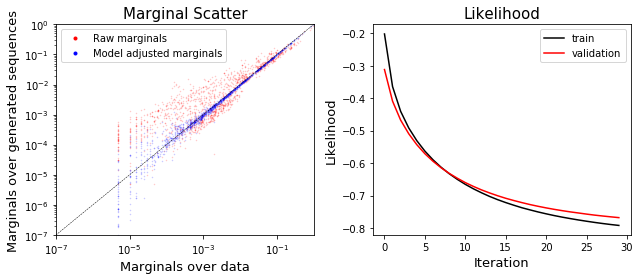

In [6]:
plot_sonia=Plotter(qm)
plot_sonia.plot_model_learning()

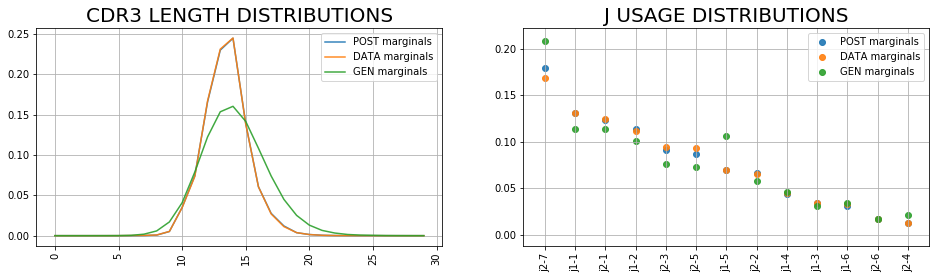

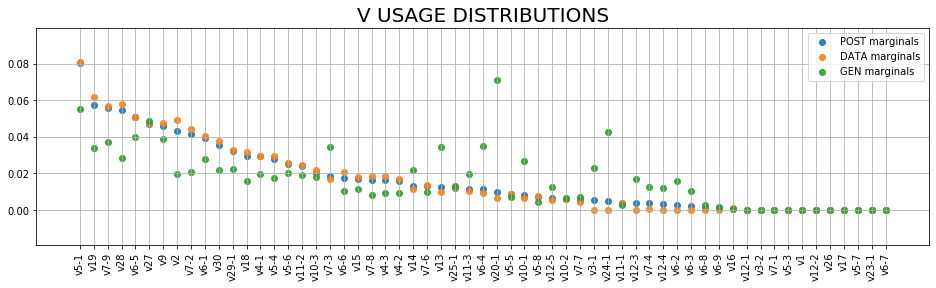

In [7]:
plot_sonia.plot_vjl()

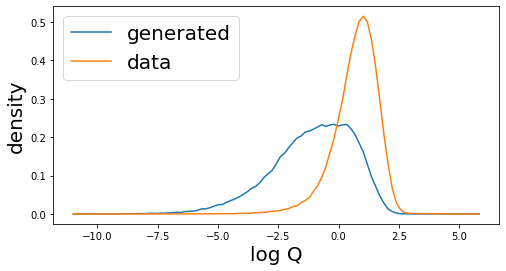

In [8]:
plot_sonia.plot_logQ()

# Generate sequences

In [9]:
gn=SequenceGeneration(qm)

In [10]:
pre_seqs=gn.generate_sequences_pre(int(1e4))
pre_seqs[:3]

[['CASSLVEGGGIYGYTF', 'TRBV27', 'TRBJ1-2'],
 ['CASSPASIERERLGNEQFF', 'TRBV5-1', 'TRBJ2-1'],
 ['CASSVGGGDQETQYF', 'TRBV5-1', 'TRBJ2-5']]

In [11]:
post_seqs=gn.generate_sequences_post(int(1e4))
post_seqs[:3]

array([['CASSLKMNTEAFF', 'TRBV5-6', 'TRBJ1-1'],
       ['CASSQGSGAWNNEQFF', 'TRBV13', 'TRBJ2-1'],
       ['CASSPRGTDGYTF', 'TRBV18', 'TRBJ1-2']], dtype='<U93')

# Evaluate sequences

In [12]:
ev=EvaluateModel(qm)

In [13]:
Q_data,pgen_data,ppost_data=ev.evaluate_seqs(qm.data_seqs[:int(1e4)])
Q_gen,pgen_gen,ppost_gen=ev.evaluate_seqs(pre_seqs)
Q_model,pgen_model,ppost_model=ev.evaluate_seqs(post_seqs)
print(Q_model[:3]),
print(pgen_model[:3])
print(ppost_model[:3])

[2.0581427 1.0419762 2.7852826]
[9.50742710e-09 1.55488226e-12 3.02075349e-08]
[1.95676413e-08 1.62015033e-12 8.41365216e-08]


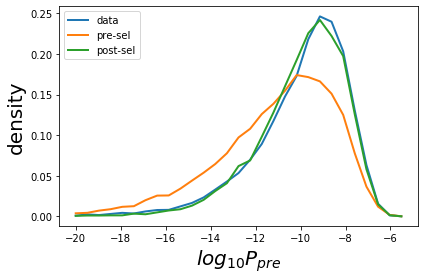

In [14]:
plot_sonia.plot_prob(data=pgen_data,gen=pgen_gen,model=pgen_model,ptype='P_{pre}')

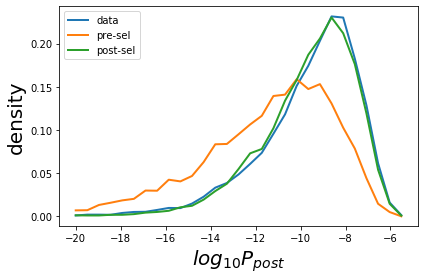

In [15]:
plot_sonia.plot_prob(ppost_data,ppost_gen,ppost_model,ptype='P_{post}')

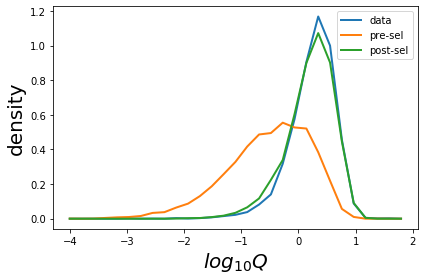

In [16]:
plot_sonia.plot_prob(Q_data,Q_gen,Q_model,ptype='Q',bin_min=-4,bin_max=2)

# some utils from OLGA

In [17]:
# evaluation and selection models import olga classes, that can be used for additional analyses.

In [19]:
gn.seq_gen_model.gen_rnd_prod_CDR3()

('TGTGCCAGCAGTATACGGGACGGGCCTCAGCCCCAGCATTTT', 'CASSIRDGPQPQHF', 35, 4)

In [20]:
gn.genomic_data.genJ[1]

['TRBJ1-2*01',
 'CTAACTATGGCTACACCTTC',
 'CTAACTATGGCTACACCTTCGGTTCGGGGACCAGGTTAACCGTTGTAG']

In [21]:
ev.pgen_model.PinsDJ

array([6.17437e-02, 3.61889e-02, 9.09608e-02, 1.05828e-01, 1.37586e-01,
       1.14643e-01, 9.60481e-02, 8.14864e-02, 6.38634e-02, 4.92164e-02,
       3.93751e-02, 2.90524e-02, 2.30059e-02, 1.64381e-02, 1.45157e-02,
       1.13759e-02, 5.79127e-03, 5.97164e-03, 3.92779e-03, 2.96191e-03,
       2.04381e-03, 2.48417e-03, 9.09996e-04, 1.35102e-03, 2.44798e-04,
       4.52171e-04, 9.17052e-04, 6.28282e-04, 0.00000e+00, 1.41295e-05,
       9.74155e-04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00])

# load default sonia models

In [22]:
# load default model (human TRA)
model_dir=os.path.join(os.path.dirname(sonia.sonia_leftpos_rightpos.__file__),'default_models','human_T_alpha')
qm=SoniaLeftposRightpos(load_dir=model_dir,chain_type='human_T_alpha')

Cannot find data_seqs.tsv  --  no data seqs loaded.
Cannot find gen_seqs.tsv  --  no generated seqs loaded.


In [29]:
sq=SequenceGeneration(sonia_model=qm)
# generate seqs pre
seqs=sq.generate_sequences_pre(10)
# generate seqs post
seqs = sq.generate_sequences_post(10)
print(seqs)

[['CAGPSNAGNMLTF' 'TRAV27' 'TRAJ39'
  'TGTGCAGGACCCAGTAATGCAGGCAACATGCTCACCTTT']
 ['CAFITRDDKIIF' 'TRAV38-1' 'TRAJ30'
  'TGTGCTTTCATAACGAGAGATGACAAGATCATCTTT']
 ['CAVLSGGSYIPTF' 'TRAV21' 'TRAJ6'
  'TGTGCTGTTCTATCAGGAGGAAGCTACATACCTACATTT']
 ['CAVDGRNAGKSTF' 'TRAV21' 'TRAJ27'
  'TGTGCTGTGGATGGCCGTAATGCAGGCAAATCAACCTTT']
 ['CAAETGQNFVF' 'TRAV13-1' 'TRAJ26' 'TGTGCAGCAGAAACTGGTCAGAATTTTGTCTTT']
 ['CLVGDIPHQAGTALIF' 'TRAV4' 'TRAJ15'
  'TGCCTCGTGGGTGACATCCCCCACCAGGCAGGAACTGCTCTGATCTTT']
 ['CAYPKFHSGGGADGLTF' 'TRAV38-2/DV8' 'TRAJ45'
  'TGTGCTTACCCCAAATTCCATTCAGGAGGAGGTGCTGACGGACTCACCTTT']
 ['CAARGQAGTALIF' 'TRAV13-1' 'TRAJ15'
  'TGTGCAGCAAGGGGACAGGCAGGAACTGCTCTGATCTTT']
 ['CATGGSYIPTF' 'TRAV13-1' 'TRAJ6' 'TGTGCAACAGGAGGAAGCTACATACCTACATTT']
 ['CIVTGSGSARQLTF' 'TRAV26-1' 'TRAJ22'
  'TGCATCGTCACAGGGTCTGGTTCTGCAAGGCAACTGACCTTT']]
